In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot

import sys, os
path2add = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
    
from knunu import knunu_utils
from ksnunu import ksnunu_utils

/tmp/user/20892/ipykernel_1426554/3656946913.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['../knunu/knunu_model.json', '../ksnunu/ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# for i in range(3, 19):
#     fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

# for i in range(3, 8):
#     fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.019088
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0190527
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0194264


{'cvl': array([10.11885139,  0.06943073]),
 'cvr': array([3.93354647, 0.10142023]),
 'csl': array([2.03216826, 0.24545692]),
 'csr': array([2.03219382, 0.24503905]),
 'ctl': array([0.96813214, 0.02033002]),
 'FFK_decorrelated[0]': array([0.00771893, 0.74670306]),
 'FFK_decorrelated[1]': array([0.01125149, 0.67532796]),
 'FFK_decorrelated[2]': array([-0.04297932,  0.40227778]),
 'FFK_decorrelated[3]': array([0.00301025, 0.95852748]),
 'FFK_decorrelated[4]': array([0.01202457, 0.82193875]),
 'FFK_decorrelated[5]': array([0.01083418, 0.59622207]),
 'FFK_decorrelated[6]': array([-0.00446793,  0.96609187]),
 'FFK_decorrelated[7]': array([0.00760963, 0.84429298]),
 'mu': array([1., 0.]),
 'stat': [[1.002409556703495, 0.008705067300326608],
  [0.9968132515720767, 0.0066153070317759854],
  [0.9977124549037557, 0.005884174175349366],
  [1.0008341575143347, 0.0056909873074170725],
  [1.0064862373072578, 0.005589915562980163],
  [0.9980109073585758, 0.00546853607801534],
  [0.9943631558025327, 0.

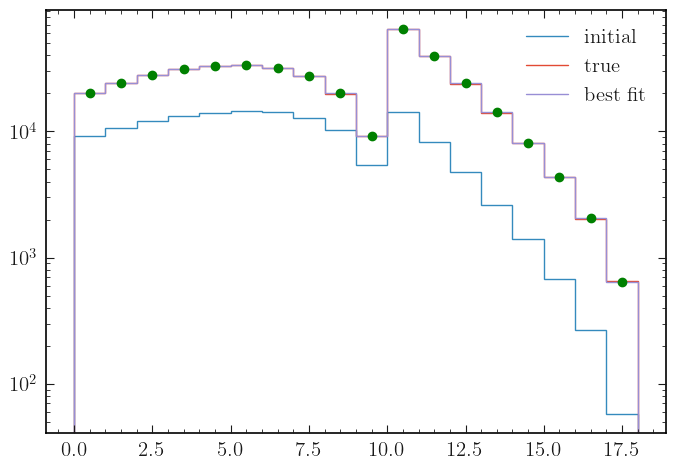

In [7]:
inits = model.config.suggested_init()
plt.stairs(model.expected_actualdata(inits), label="initial")
inits[model.config.par_map['cvl']['slice']] = [10]
inits[model.config.par_map['cvr']['slice']] = [4]
inits[model.config.par_map['csl']['slice']] = [3]
inits[model.config.par_map['csr']['slice']] = [1]
inits[model.config.par_map['ctl']['slice']] = [1]
plt.stairs(model.expected_actualdata(inits), label="true")
plt.stairs(model.expected_actualdata(best_fit[:,0]), label = "best fit")
x = np.linspace(0.5, 17.5, 18)
plt.plot(x, data[:18], 'og')
plt.yscale('log')
plt.legend()